# Introduction to Regression with Neural Networks in TensorFlow

There are many defenitions for a redression problem. For simplicity we say predicting a numerical variable based on some other combination of variables.
i.e, predicting a number

In [ ]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating some data to view and fit

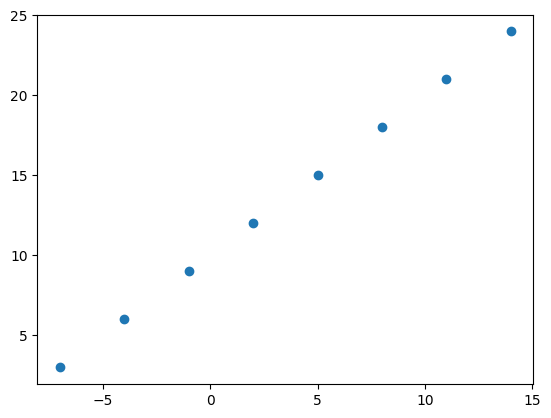

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0,-4.0,-1.0, 2.0,5.0,8.0,11.0, 14.0])

#create labels
Y = np.array([3.0, 6.0, 9.0,12.0, 15.0, 18.0, 21.0,24.0])

#visualize it
plt.scatter(X,Y)

In [ ]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

## Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction

house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = Y.shape

input_shape, output_shape

((8,), (8,))

In [ ]:
# turn our numpy arrays to tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(Y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Creating a model** - defining the input and output layers, as well as the hidden layers of a deep learning model
2. **Compiling a model** - defining the loss function(function which tells our model how wrong it is) and the optimizer(tells our model how to improve the patterns its learning) and the evaluation metric(what we use to interpret the perfomance of our model)
3. **Fitting the model** - letting the model to try to find patterns between X and y


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using sequential api
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),y, epochs=5)


Epoch 1/5
1/1 [==============================] - 0s 432ms/step - loss: 18.8759 - mae: 18.8759
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 18.5946 - mae: 18.5946
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 18.3134 - mae: 18.3134
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 18.0321 - mae: 18.0321
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 17.7509 - mae: 17.7509


In [ ]:
# checkout X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 84ms/step


array([[-15.336114]], dtype=float32)

In [ ]:
y_pred +14

array([[-1.3361139]], dtype=float32)

## Improving our model

We can improve the model by altering the steps we took to create a model

1. **Creating Model** - here we might add more layers, increase the number of hidden units(neuros) within each hidden layer, change the activation functions of each layer
2. **Compiling a model** - Here we might chnage the optimization function or learning rate of the said optimization function
3. **Fitting a model** - here we might fit a model for more **epochs** or on more data (give the model more examples to train from)


In [ ]:
# Expanding the dimensions of the X
X = tf.expand_dims(X, axis=-1)

In [ ]:
# Lets rebuild our model

# 1. Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

#3. Fit model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 290ms/step - loss: 16.4110 - mae: 16.4110
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 16.1297 - mae: 16.1297
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 15.8485 - mae: 15.8485
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 15.5672 - mae: 15.5672
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 15.2860 - mae: 15.2860
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 15.0047 - mae: 15.0047
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 14.7932 - mae: 14.7932
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 14.6607 - mae: 14.6607
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 14.5282 - mae: 14.5282
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 14.3957 - mae: 14.3957
Epoch 11/100
1/1 [==============================] - 0s

In [ ]:
# making prediction on the improved model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 73ms/step


array([[29.502872]], dtype=float32)

In [ ]:
# trying with a larger model

#1. Creating model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(1))

# 2. Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.mae, metrics=["mae"])


# 3. Fitting the model
model.fit(X,y, epochs=100)



Epoch 1/100
1/1 [==============================] - 1s 838ms/step - loss: 13.5726 - mae: 13.5726
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 13.4579 - mae: 13.4579
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 13.3445 - mae: 13.3445
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 13.2304 - mae: 13.2304
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 13.1145 - mae: 13.1145
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 12.9964 - mae: 12.9964
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 12.8753 - mae: 12.8753
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 12.7508 - mae: 12.7508
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 12.6224 - mae: 12.6224
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 12.4895 - mae: 12.4895
Epoch 11/100
1/1 [==============================] - 0s 1

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 107ms/step


array([[26.779915]], dtype=float32)

In [ ]:
# Creating another larger model

# 1. Creating model(with an extra hidden layer with 100 neurons)

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(50, activation=None),
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["mae"])

# 3. Fitting the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 794ms/step - loss: 13.6892 - mae: 13.6892
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 12.9477 - mae: 12.9477
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 12.2050 - mae: 12.2050
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 11.4599 - mae: 11.4599
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 10.7106 - mae: 10.7106
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 9.9550 - mae: 9.9550
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 9.1906 - mae: 9.1906
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 8.4150 - mae: 8.4150
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 7.6260 - mae: 7.6260
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 6.8212 - mae: 6.8212
Epoch 11/100
1/1 [==============================] - 0s 8ms/st

In [ ]:
# The data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 248ms/step


array([[26.892197]], dtype=float32)

**NOTE:** **Learning Rate** is the most important hyper parameter to improve the model perfomance

## Evaluating a model

In practice, a typical workflow you'll go through when building a neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> ....

```

When it comes to evaluation we need to visualize.
* Visualize the data - what does the data look like? what kind of data are we working with?
* The model itself - What does the model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model lineup against the ground truth(original labels)


In [ ]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

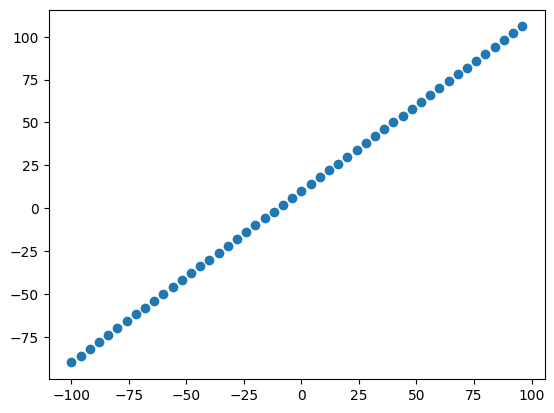

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,Y)

### The 3 sets...

* **Training set** - the model learns from this data, which is 70-80% of the data available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of available data.
* **Test set** - the model gets evaluated on this data to test what it has learned. This set is typically 10-15% of data available

In [ ]:
 # Split the data into train and test set

X_train = X[:40]
X_test = X[40:]

y_train = Y[:40]
y_test = Y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

We have our data in training and test sets... let's visualize it

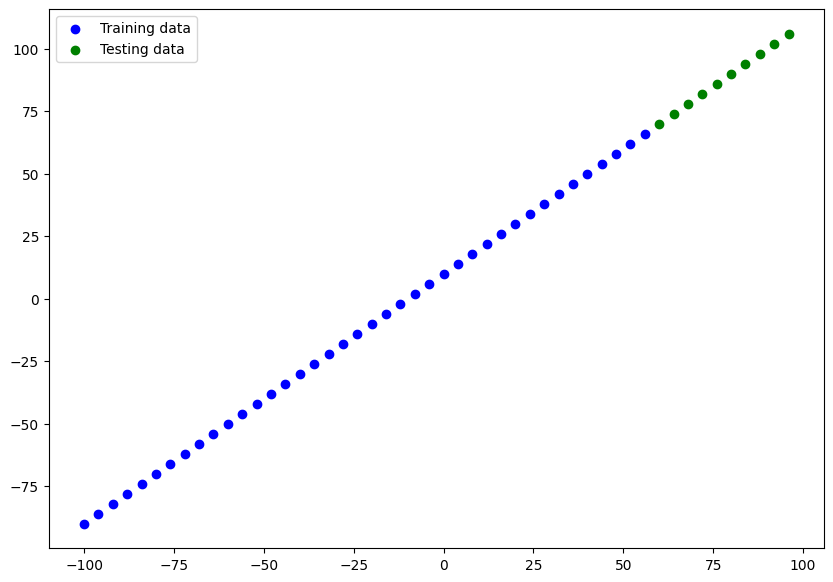

In [ ]:
plt.figure(figsize=(10,7))
#plot triaing data in blue
plt.scatter(X_train, y_train, c='b', label="Training data")
# plot the test data in green
plt.scatter(X_test, y_test, c='g', label="Testing data")

#show the legend
plt.legend();

In [ ]:
# Let's have a look at how we build the neural network for our data

# 1. Create a model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1)
    ]
)

# 2 Compile the model
model.compile(loss = tf.keras.losses.mae, optimizer= tf.keras.optimizers.SGD(), metrics=["mae"])

# 3.Fit the model
model.fit(tf.expand_dims(X_train,-1), y_train, epochs=100)



Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 18.4183 - mae: 18.4183
Epoch 2/100
2/2 [==============================] - 0s 15ms/step - loss: 13.4621 - mae: 13.4621
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 12.2326 - mae: 12.2326
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.3566 - mae: 9.3566
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.2337 - mae: 10.2337
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4886 - mae: 9.4886
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.6194 - mae: 8.6194
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0499 - mae: 9.0499
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.8712 - mae: 18.8712
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1819 - mae: 10.1819
Epoch 11/100
2/2 [==============================] - 0s 19ms/step

### Visualize the model

> The below code will not work because if we want to get model summary we must provide the `input_shape` parameter for the input layer

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Let's create a model which builds automatically by defining input_shape argument for first layer
tf.random.set_seed(42)

# Creata a model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
        tf.keras.layers.Dense(100, name="hidden_layer1"),
        tf.keras.layers.Dense(1, name="output_layer")
    ], name="model_1"
)

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["mae"])



In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 hidden_layer1 (Dense)       (None, 100)               1100      
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 1221 (4.77 KB)
Trainable params: 1221 (4.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total Params - total number of parameters in the model
* Trainable Params - These are parameters (patterns) the model can update it as it trains
* Non trainable params - these parameters aren't updated during training ( this is typical when you bring in already learned patterns or parameters from other models during **transfer learning**)

**Resource**: To find more find MITs video on introduction to deep learning

In [ ]:
# Modify the number of layers to notice the changes in trainable and non trainable params

test_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]),
    tf.keras.layers.Dense(3),
    tf.keras.layers.Dense(1)
])

test_model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

test_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
 dense_11 (Dense)            (None, 3)                 6         
                                                                 
 dense_12 (Dense)            (None, 1)                 4         
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
test_model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1, input_shape=[1]),
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(3)
    ]
)

test_model_2.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

test_model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
 dense_14 (Dense)            (None, 100)               200       
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10605 (41.43 KB)
Trainable params: 10605 (41.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Get a summary of out model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 hidden_layer1 (Dense)       (None, 100)               1100      
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 1221 (4.77 KB)
Trainable params: 1221 (4.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


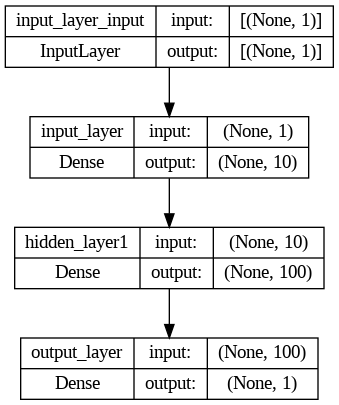

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes=True)

In [ ]:
# lets fit our model
model.fit(X_train, y_train, epochs=100, verbose=0)

### Visualising the model predictions

To visualise the predictions, it's a good idea to plot them against ground truth labels.

Often you will see this in the form of `y_test` or `y_true` versus `y_pred`(ground truth versus your model predictions)

In [ ]:
# make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 295ms/step


array([[ 69.368576],
       [ 73.33537 ],
       [ 77.30215 ],
       [ 81.26894 ],
       [ 85.235725],
       [ 89.202515],
       [ 93.169304],
       [ 97.1361  ],
       [101.102875],
       [105.06965 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data = X_train, train_labels=y_train, test_data=X_test, test_labels = y_test, predictions=y_pred):
  '''
  Plots training data test data and compares the predictions to ground truth labels
  '''
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="training data")

  #plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")

  #plot models predictions in red
  plt.scatter(test_data, predictions, c='r', label="Predictions")
  #show the legends
  plt.legend();


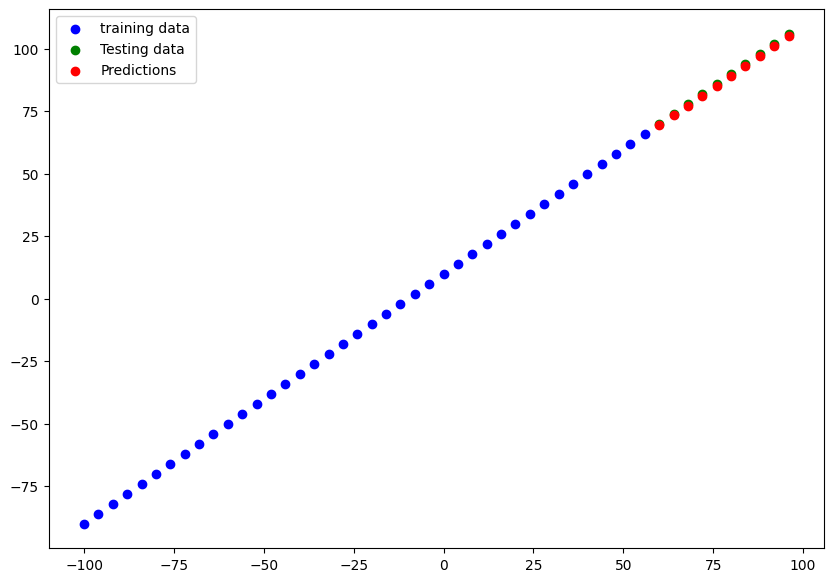

In [ ]:
plot_predictions()

### Evaluationg our model's prediction with regression evaluation metrics

Depending on our problem you are working on there will be differrent evaluationmetrics to your model's perfomance.

Since we are working on a regression, two of the main metrics are:
* MAE - Mean Absolute Error ,"On average how wrong is each of the model's predictions"
* MSE - Mean Squared Error ,"square the average errors"

In [ ]:
# Evaluate the model
model.evaluate(X_test,  y_test)

1/1 [==============================] - 0s 310ms/step - loss: 0.7809 - mae: 0.7809


[0.7808791995048523, 0.7808791995048523]

In [ ]:
# Calculate the mean absolute error
tf.losses.MAE(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.7808792>

In [ ]:
y_pred

array([[ 69.368576],
       [ 73.33537 ],
       [ 77.30215 ],
       [ 81.26894 ],
       [ 85.235725],
       [ 89.202515],
       [ 93.169304],
       [ 97.1361  ],
       [101.102875],
       [105.06965 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# calculating the mean squared error
tf.losses.MSE(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.6188731>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))



### Running experiments to improve our model

1. Get more data - get more examples for your model to train on(more oppurtunities to learn patterns or relationships between features and labels).
2. Make your model larger (using more complex model) - this might come in the form of more layers or mode hidden units in each layer.
3. Train for longer - give your modelmore of a chance for finding patterns in the data.


Let's do 3 modelling experiments.
1. `model_1` - same as orginal model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

** Build `model_1` **

In [ ]:
tf.expand_dims(X_train,-1), y_train

(<tf.Tensor: shape=(40, 1), dtype=int32, numpy=
 array([[-100],
        [ -96],
        [ -92],
        [ -88],
        [ -84],
        [ -80],
        [ -76],
        [ -72],
        [ -68],
        [ -64],
        [ -60],
        [ -56],
        [ -52],
        [ -48],
        [ -44],
        [ -40],
        [ -36],
        [ -32],
        [ -28],
        [ -24],
        [ -20],
        [ -16],
        [ -12],
        [  -8],
        [  -4],
        [   0],
        [   4],
        [   8],
        [  12],
        [  16],
        [  20],
        [  24],
        [  28],
        [  32],
        [  36],
        [  40],
        [  44],
        [  48],
        [  52],
        [  56]], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
# Creating first model

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compiling the model
model_1.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.mae, metrics=["mae"])

# fitting the model
model_1.fit(tf.expand_dims(X_train,-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 14ms/step - loss: 86.1623 - mae: 86.1623
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 50.7068 - mae: 50.7068
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 15.6688 - mae: 15.6688
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 8.2471 - mae: 8.2471
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.6336 - mae: 10.6336
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 9.8441 - mae: 9.8441
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 8.9197 - mae: 8.9197
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 9.0979 - mae: 9.0979
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 19.5788 - mae: 19.5788
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 10.5924 - mae: 10.5924
Epoch 11/100
2/2 [==============================] - 0s 7ms/st

1/1 [==============================] - 0s 101ms/step


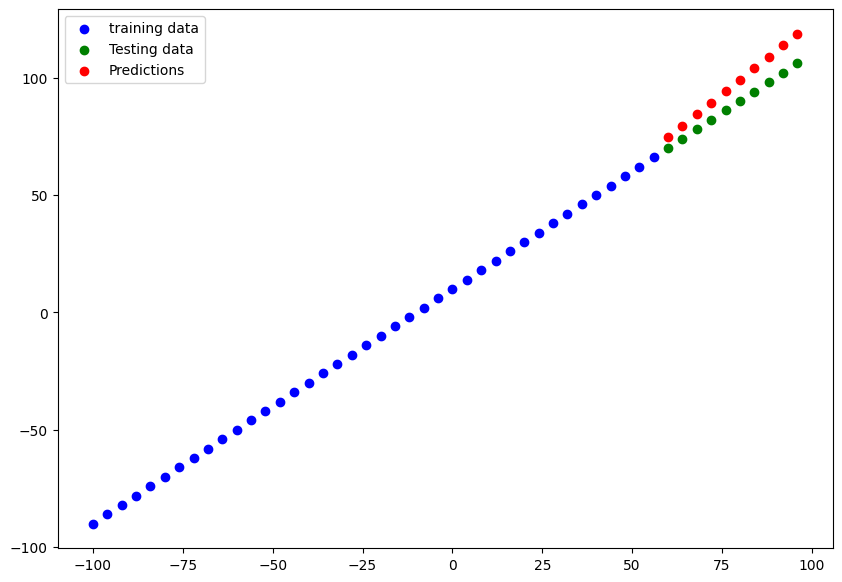

In [ ]:
# Make and plot predictions for model_1

y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaliation matrix
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

In [ ]:
mae_1 , mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.632247>,
 <tf.Tensor: shape=(), dtype=float32, numpy=81.04327>)

**Build `model_2`**

* 2 Layers trained for 100 epochs

In [ ]:
# Creating `model_2`

tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    # tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compiling the model
model_2.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mse"])

# Fitting the model
model_2.fit(tf.expand_dims(X_train,-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 16ms/step - loss: 15.1543 - mse: 323.2598
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 24.9998 - mse: 973.6164
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 18.1860 - mse: 484.0103
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 13.3507 - mse: 237.4210
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 14.7908 - mse: 272.9697
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.7852 - mse: 163.6687
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.8736 - mse: 228.2652
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1074 - mse: 159.1060
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 40.5986 - mse: 2601.7451
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 27.9772 - mse: 1103.1199
Epoch 11/100
2/2 [==========================

In [ ]:
y_preds_2 = model_2.predict(X_test)
y_preds_2

1/1 [==============================] - 0s 153ms/step


array([[ 78.41232 ],
       [ 83.52038 ],
       [ 88.628426],
       [ 93.73647 ],
       [ 98.84452 ],
       [103.95255 ],
       [109.060616],
       [114.16865 ],
       [119.2767  ],
       [124.38476 ]], dtype=float32)

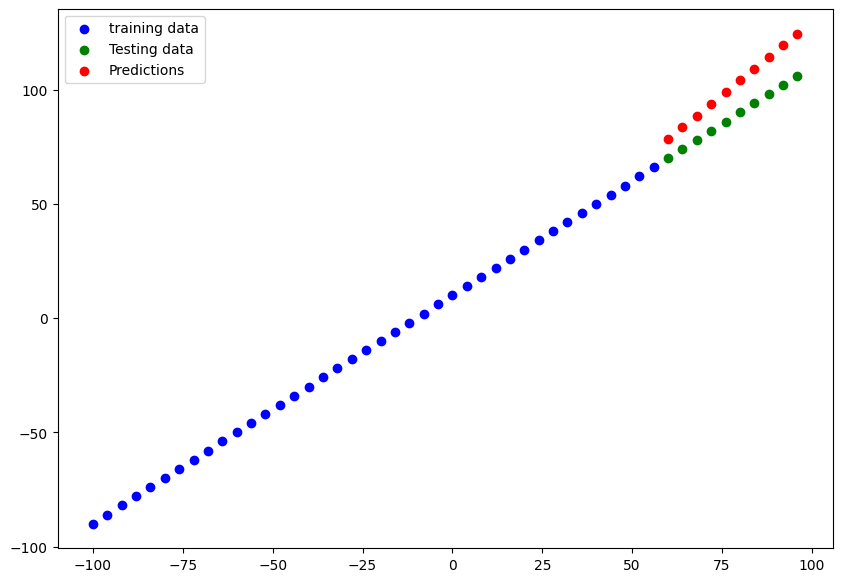

In [ ]:
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate the model evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)

In [ ]:
mse_2, mae_2

(<tf.Tensor: shape=(), dtype=float32, numpy=189.64996>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.39854>)

**Build *model_3**

* 2 Layers, 500 epochs

In [ ]:
# Building model 3

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compiling the model

model_3.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

#fitting the model
model_3.fit(tf.expand_dims(X_train,-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 2s 9ms/step - loss: 33.0952 - mae: 33.0952
Epoch 2/500
2/2 [==============================] - 0s 10ms/step - loss: 24.7244 - mae: 24.7244
Epoch 3/500
2/2 [==============================] - 0s 14ms/step - loss: 30.5742 - mae: 30.5742
Epoch 4/500
2/2 [==============================] - 0s 14ms/step - loss: 24.5942 - mae: 24.5942
Epoch 5/500
2/2 [==============================] - 0s 11ms/step - loss: 14.5795 - mae: 14.5795
Epoch 6/500
2/2 [==============================] - 0s 14ms/step - loss: 11.6109 - mae: 11.6109
Epoch 7/500
2/2 [==============================] - 0s 14ms/step - loss: 10.9592 - mae: 10.9592
Epoch 8/500
2/2 [==============================] - 0s 24ms/step - loss: 11.0050 - mae: 11.0050
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 39.4871 - mae: 39.4871
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 27.0079 - mae: 27.0079
Epoch 11/500
2/2 [==============================] - 

In [ ]:
# predicting on the model
y_preds_3 = model_3.predict(X_test)
y_preds_3

1/1 [==============================] - 0s 82ms/step


array([[16.323025],
       [17.11659 ],
       [17.910156],
       [18.703722],
       [19.497288],
       [20.290855],
       [21.084423],
       [21.877987],
       [22.671555],
       [23.465118]], dtype=float32)

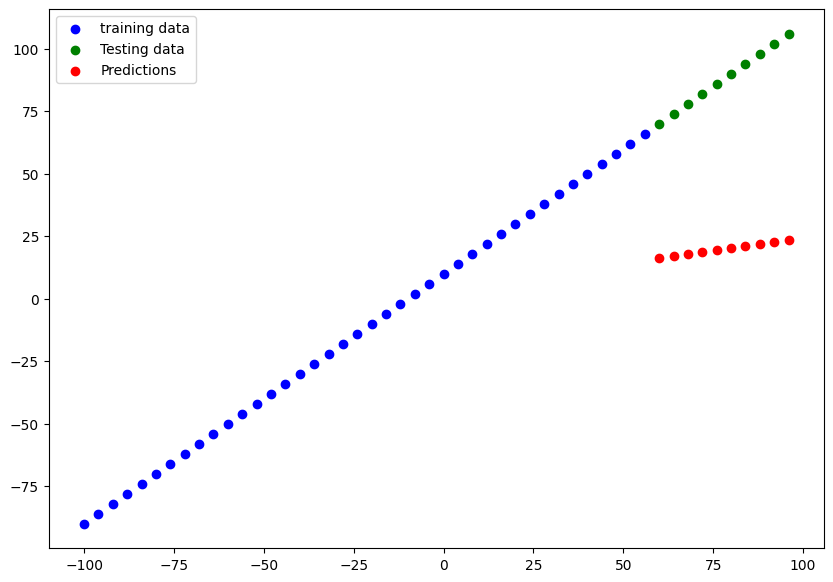

In [ ]:
#plotting predictions
plot_predictions(predictions=y_preds_3)

In [ ]:
mse_3 = mse(y_pred=y_preds_3, y_true=y_test)
mae_3 = mae(y_pred=y_preds_3, y_true=y_test)
mse_3, mae_3

(<tf.Tensor: shape=(), dtype=float32, numpy=4723.2373>,
 <tf.Tensor: shape=(), dtype=float32, numpy=68.10593>)

**Note:** You want to start with small experiments(small models) and make sure they work and then increase their scale

### Compairing the Results of Experiments

Let's compare the results of the experiments

In [ ]:
# Let's compare our model's result using a pandas DataFrame
import pandas as pd

model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],["model_2",mae_2.numpy(),mse_2.numpy()],["model_3",mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model","mae",mse])

all_results

,model,mae,<function mse at 0x7efde46357e0>
0,model_1,8.632247,81.043266
1,model_2,13.398540,189.649963
2,model_3,68.105927,4723.237305


Looks like `model_2` performed the best

In [ ]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                20        
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> **NOTE:** One of your main goal should be to minimize the time between your experiments. The more experiments you do, the more things you will figure out which don't work and in turn get close to figuring out what does work. Remember the machine learning practioner's motto : "experiment...experiment....experiment"

## Tracking Your Experiments

One really good habit in machine learning modelling is to track results of your experiments.

And when doing so, it can be tedious if you are doing lot's of experiments.

Luckily we have tools to help us:

**Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments(we'll se later)
* Weights & Biases -  a tool for tracking all kinds of machine learning experiments (plugs straight into tensorboard)

## Saving our models

Saving our model allows us to use them outside of Google Colab(or whereever they were trained) such as in a web application or a mobile app.

There are 3 main formats which we can save our model's format:

1. The SavedModel format
2. The HDF5 format(Considered Laegacy)
3. The keras format(now commonly used)

In [ ]:
# saving the model using SavedModel format
model_2.save("best_model_SavedModel_format")

In [ ]:
# Saving the model in HDF5
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Saving the model in keras format
model_2.save("best_model_keras_format.keras")

## Loading a Saved Model


In [ ]:
# Loading in the SavedModel format model
loaded_SavedModel = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                20        
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                20        
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compare model2 predictions with SavedModel format predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_preds = loaded_SavedModel.predict(X_test)
model_2_preds == loaded_SavedModel_preds

1/1 [==============================] - 0s 74ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# Loading using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                20        
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# check to see if the loaded h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 51ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Loading the .keras format model
loaded_keras_model = tf.keras.models.load_model("/content/best_model_keras_format.keras")
loaded_keras_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                20        
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# compairing model_2 and loaded_keras_model
loaded_keras_model_preds = loaded_keras_model.predict(X_test)
model_2_preds = model_2.predict(X_test)
model_2_preds == loaded_keras_model_preds

1/1 [==============================] - 0s 20ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a Model(or any other file) from Google Colab

If you want to download files from collab there are a couple of ways

1. Go to files tab and download the required file.
2. Use code(see the cell below)
3. Save it to google drive and copying it there(see the 2nd cell below)

In [ ]:
# download file from google colab
# from google.colab import files
#files.download("/content/best_model_keras_format.keras")

In [ ]:
# Saving to drive (required mounting the google drive)
#!cp /content/best_model_keras_format.keras /content/drive/MyDrive/

## A Larger Example

In [ ]:
# imoprt the necessary libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Read the inusrance data
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
# Let's try onehot encode our dataframe
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X and Y values (features and labels)
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot.charges

In [ ]:
# View X
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [ ]:
# View y
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
# Create training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
# checking the size of X, x_train, x_test
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# check the size of y, y_train, y_test
len(y), len(y_train), len(y_test)

(1338, 1070, 268)

In [ ]:
# Building a model
tf.random.set_seed(42)

#creating a model
insurance_model = tf.keras.models.Sequential(
    [tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
     ]
)

#compiling model
insurance_model.compile(loss=tf.keras.losses.mae, optimizer = tf.keras.optimizers.SGD(), metrics=["mae"])

#fit the model
insurance_model.fit(X_train, y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8598.9453 - mae: 8598.9453
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7873.7231 - mae: 7873.7231
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7574.5645 - mae: 7574.5645
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7671.5273 - mae: 7671.5273
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7657.2593 - mae: 7657.2593
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7583.9351 - mae: 7583.9351
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7569.8516 - mae: 7569.8516
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7794.4600 - mae: 7794.4600
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7621.2178 - mae: 7621.2178
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7749.3120 - mae: 7749.3120

In [ ]:
# Check the results of insurance model on test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7286.0303 - mae: 7286.0303


[7286.0302734375, 7286.0302734375]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model is not performing too well... let's try to improve the model

In [ ]:
#creating a test model
test_insurance_model_1 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(50, activation="relu"),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(1)
    ]
)

#compiling the test model 1
test_insurance_model_1.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["mae"])

# fitting the model
test_insurance_model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 12130.4561 - mae: 12130.4561
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7577.2661 - mae: 7577.2661
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7292.1812 - mae: 7292.1812
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7085.2314 - mae: 7085.2314
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 6889.1440 - mae: 6889.1440
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 6665.1431 - mae: 6665.1431
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 6506.3169 - mae: 6506.3169
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 6335.0884 - mae: 6335.0884
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 6207.3530 - mae: 6207.3530
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 6050.1089 - mae: 6050.10

In [ ]:
test_insurance_model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1795.5913 - mae: 1795.5913


[1795.59130859375, 1795.59130859375]

1. Add an extra model with more hidden units and use Adam optimizer
2. Train for longer

In [ ]:
X_train.shape

(1070, 11)

In [ ]:
# set random seed
tf.random.set_seed(42)

# create model
insurance_model_2 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ]
)

# compiling the model
insurance_model_2.compile(loss=tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(), metrics=["mae"])

#fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 2s 3ms/step - loss: 13288.8936 - mae: 13288.8936
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13106.9551 - mae: 13106.9551
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12736.4043 - mae: 12736.4043
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12016.6846 - mae: 12016.6846
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10821.9717 - mae: 10821.9717
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9329.6738 - mae: 9329.6738
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8025.2119 - mae: 8025.2119
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7478.5483 - mae: 7478.5483
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7400.8394 - mae: 7400.8394
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7380.9951 - mae:

**NOTE:** When you see that the loss:nan and error metric:nan there is something wrong with your model. In that case change the number of layers, or change the optimizer to Adam.

In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4814.9263 - mae: 4814.9263


[4814.92626953125, 4814.92626953125]

In [ ]:
# Trying another experiment

#set random seed
tf.random.set_seed(42)

#creating model same as above
insurance_model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compiling the model
insurance_model_3.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])

#fitting the model
history = insurance_model_3.fit(X_train, y_train, epochs=500, verbose=1)

Epoch 1/500
34/34 [==============================] - 1s 2ms/step - loss: 13283.5195 - mae: 13283.5195
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 13092.3369 - mae: 13092.3369
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 12684.1045 - mae: 12684.1045
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 11895.7148 - mae: 11895.7148
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 10639.7188 - mae: 10639.7188
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 9154.0771 - mae: 9154.0771
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 7933.9702 - mae: 7933.9702
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 7477.2090 - mae: 7477.2090
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 7416.4966 - mae: 7416.4966
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 7396.8247 - mae:

In [ ]:
# Evaluating the model_3
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3168.3953 - mae: 3168.3953


[3168.395263671875, 3168.395263671875]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 7286.0303 - mae: 7286.0303


[7286.0302734375, 7286.0302734375]

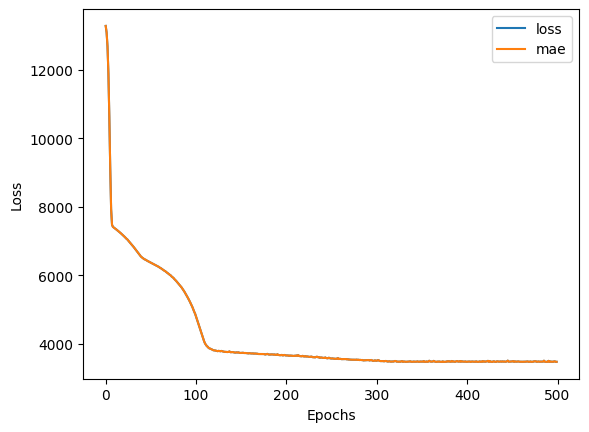

In [ ]:
# Plot history(also known as loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs");


>**Question:** How long should you train a model?
It depends the problem you are working on. Many people has asked this question and tensorflow has a solution called early stopping callback. It is a tensorflow component which stops training when a certain metric stops improving

In [ ]:
# creating the above model with early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

insurance_model_3_opt = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3_opt.compile(loss=tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(), metrics=["mae"])

history_opt = insurance_model_3_opt.fit(X_train, y_train, epochs=500,  callbacks=[callback])

Epoch 1/500
34/34 [==============================] - 1s 2ms/step - loss: 13296.7744 - mae: 13296.7744
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 13155.5635 - mae: 13155.5635
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 12843.9062 - mae: 12843.9062
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 12222.6172 - mae: 12222.6172
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 11162.8682 - mae: 11162.8682
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 9745.1475 - mae: 9745.1475
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 8357.8340 - mae: 8357.8340
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 7589.0571 - mae: 7589.0571
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 7429.5557 - mae: 7429.5557
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 7406.6108 - mae:

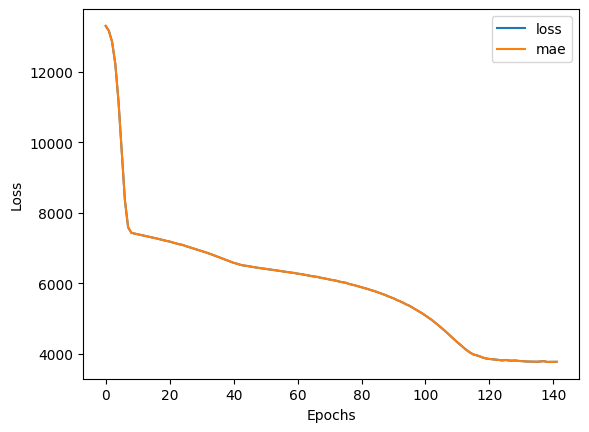

In [ ]:
pd.DataFrame(history_opt.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss");

## Preprocessing Data (Normalizarion and Standardization)

In terms of scaling values neural networks tend to prefer normalization.
If you are not sure which to use, you could try both and see which one performs better. Normalized data provides faster convergence i.e, it provides better results within less time(less number of epochs)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# read in the data again
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data we need some classes from Scikit Learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi','children']), #turn all values in these columns to values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

#create X and Y
X = insurance.drop('charges',axis=1)
y = insurance['charges']

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Fit the column transformer to out training data
ct.fit(X_train)

# transform training and test data with normalization(Minmaxscaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)



In [ ]:
# what does our data look like
X_train_normal[0],

(array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]),)

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data has beeen normalized and one hot encoded. Let's build a neural network model.

In [ ]:
# Build a model
tf.random.set_seed(42)
normalized_insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compiling the model
normalized_insurance_model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])

#fit the model
normalized_model_history = normalized_insurance_model.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 7ms/step - loss: 13343.7959 - mae: 13343.7959
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13334.4648 - mae: 13334.4648
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 13311.8047 - mae: 13311.8047
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 13265.1992 - mae: 13265.1992
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13183.1006 - mae: 13183.1006
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13054.1191 - mae: 13054.1191
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 12868.0049 - mae: 12868.0049
Epoch 8/100
34/34 [==============================] - 0s 7ms/step - loss: 12614.7900 - mae: 12614.7900
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 12284.3574 - mae: 12284.3574
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 11874.17

In [ ]:
normalized_insurance_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 1s 3ms/step - loss: 3438.2634 - mae: 3438.2634


[3438.263427734375, 3438.263427734375]

<Axes: ylabel='Frequency'>

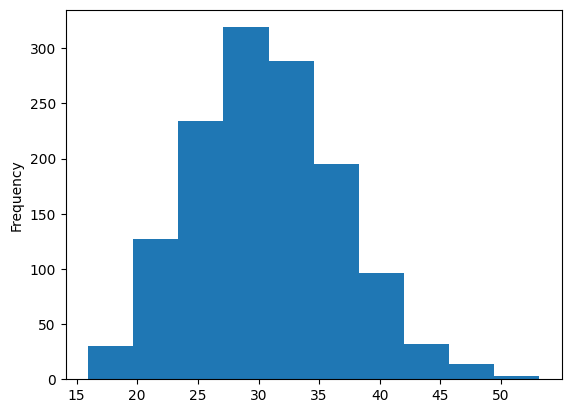

In [ ]:
X["bmi"].plot(kind="hist")

<Axes: >

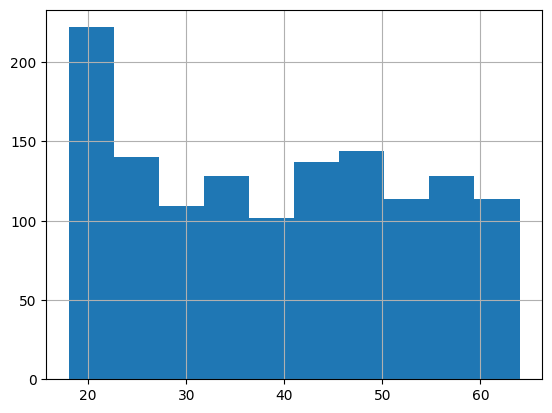

In [ ]:
X["age"].hist()